### **_YouTube ve Spotify EDA Analizi_**

* Bu analiz, YouTube ve Spotify platformlarinda sarki ve sanatci bazinda goruntulenme ve dinlenme verilerinin kesifsel veri analizini (EDA) amaclamaktadir.

### Veri Seti: "https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube/data"

  **_Hedef:_**
* Dinlenme aliskanliklarini anlamak, populer sanatcilari ve sarkilari belirlemek, verideki olasi duzensizlikleri ve korelasyonlari ortaya cikarmak



In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# grafikler icin ayar
sns.set(style="whitegrid")
%matplotlib inline

In [29]:
df = pd.read_csv("Spotify_Youtube_.csv")
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [30]:
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [31]:
df.info()

missing = df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [32]:
df.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [33]:
categorical_cols = df.select_dtypes(include='object').columns
print("Kategorik Degiskenler:", list(categorical_cols))

numerical_cols = df.select_dtypes(include=np.number).columns
print("Sayisal Degiskenler:", list(numerical_cols))

Kategorik Degiskenler: ['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri', 'Url_youtube', 'Title', 'Channel', 'Description', 'Licensed', 'official_video']
Sayisal Degiskenler: ['Unnamed: 0', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream']


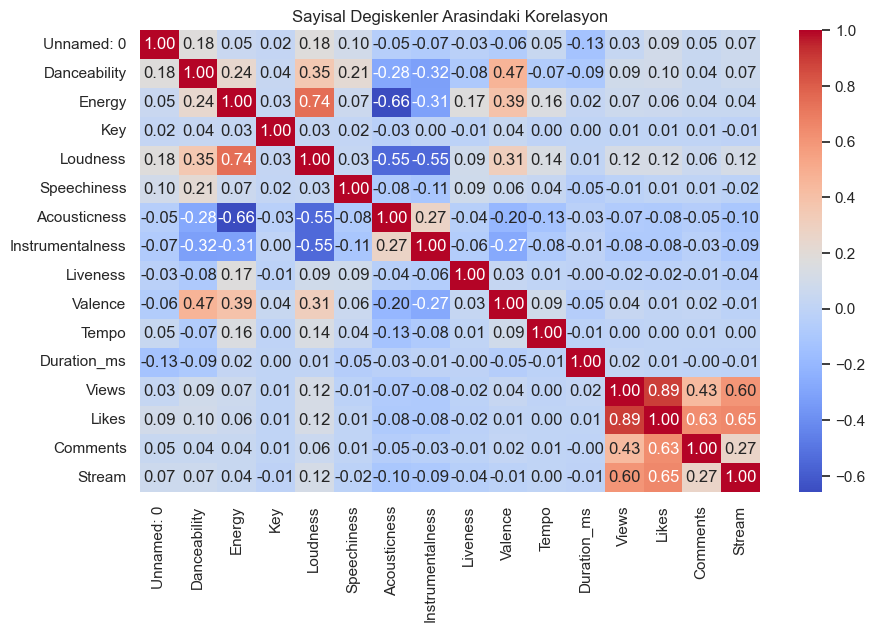

In [34]:
plt.figure(figsize=(10, 6))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Sayisal Degiskenler Arasindaki Korelasyon")
plt.show()

**_Degiskenler Arasindaki Iliski: Korelasyon_**

* Bu grafik, degiskenlerin birbiriyle olan iliskisini gosterir (ornegin: Likes ile Views arasinda yuksek pozitif korelasyon olabilir).
* corr() fonksiyonu sadece sayisal sutunlari dikkate alir.
* Eger bazi degiskenler arasinda yuksek korelasyon varsa, bu durum coklu dogrusal baglantiya (multicollinearity) yol acabilir – bu da ozellikle modelleme asamasinda dikkate alinmasi gereken bir durumdur.

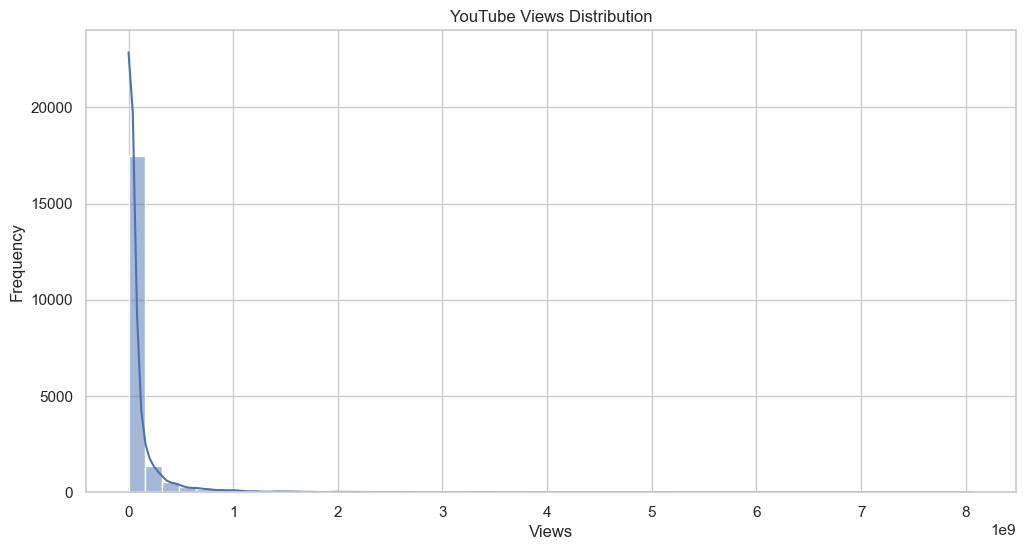

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df['Views'], bins=50, kde=True)
plt.title("YouTube Views Distribution")
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.show()

**_Dagilim Analizi: Goruntulenme Sayilari_**

* Goruntulenme sayilarinin cok buyuk bir kismi dusuk aralikta toplanmis, yani dagilim saga carpik (right-skewed).
* Bu durumda, veriyi daha dengeli hale getirmek icin log donusumu uygulanmasi faydali olabilir.

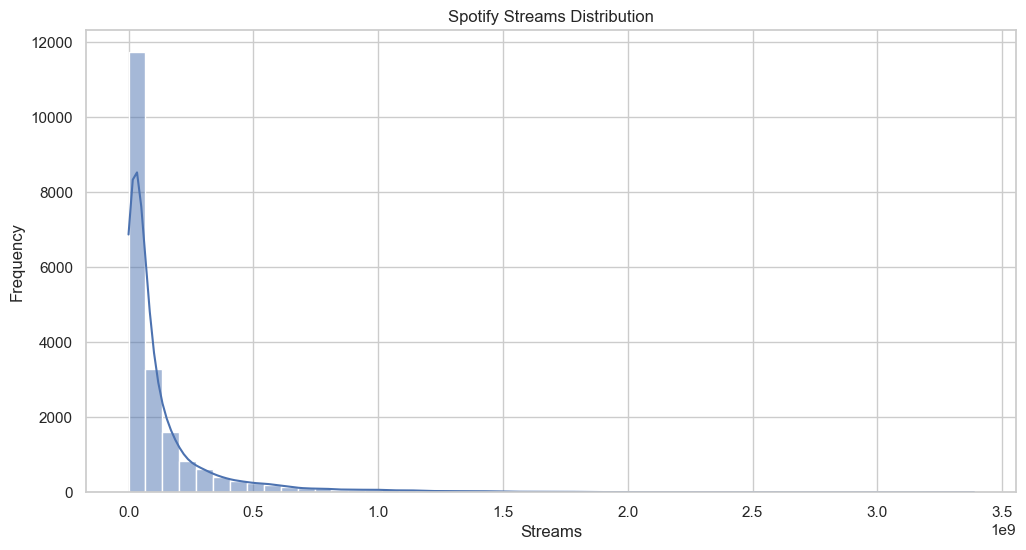

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df['Stream'], bins=50, kde=True)
plt.title("Spotify Streams Distribution")
plt.xlabel("Streams")
plt.ylabel("Frequency")
plt.show()

**_Spotify Dinlenmeleri: Dengesiz Dagilim_**

* Benzer sekilde Spotify dinlenmeleri de saga carpik olabilir
* Populer sarkilarin dinlenme sayilari cok yuksekken, cogu sarki orta-dusuk seviyelerde kalmis

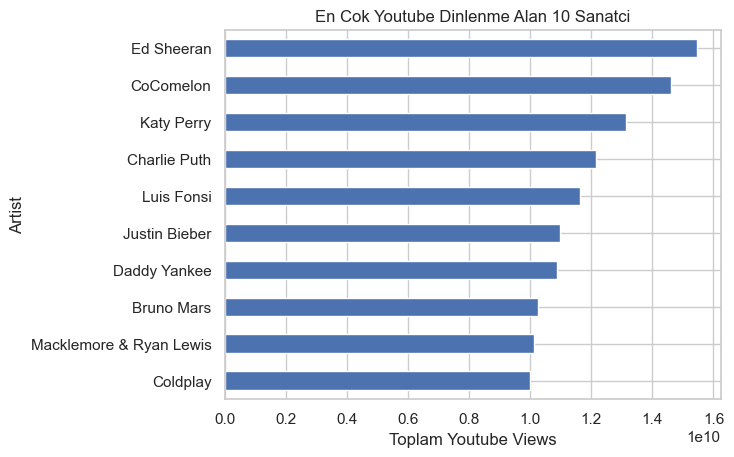

In [37]:
top_artists = df.groupby('Artist')['Views'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

top_artists.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel("Toplam Youtube Views")
plt.title("En Cok Youtube Dinlenme Alan 10 Sanatci")
plt.gca().invert_yaxis()
plt.show()

**_En Cok Youtube Dinlenme Alan 10 Sanatci_**

* Bu grafik, en fazla goruntulenme alan 10 sanatciyi gostermektedir
* Youtube Views degerlerine gore siralama yapilmis ve en yuksek izlenmeye sahip sanatci en ustte olacak sekilde grafik ters cevrilerek sunulmustur
* Gozle gorulur sekilde, bir veya iki sanatci digerlerine oranla belirgin sekilde onde; bu da bu sanatcilarin platform uzerindeki etkisini gosterir
* Genel dagilima bakildiginda, populerligin az sayida sanatci uzerinde toplandigi gorulmektedir – bu da pareto etkisi (80/20 kurali) ile aciklanabilir

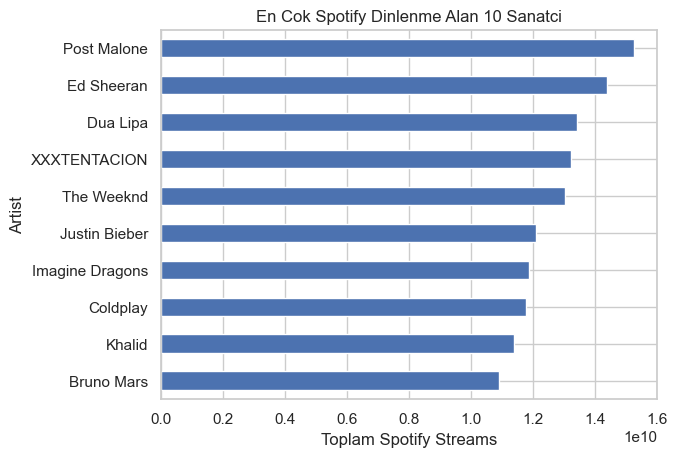

In [38]:
top_artists = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

top_artists.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel("Toplam Spotify Streams")
plt.title("En Cok Spotify Dinlenme Alan 10 Sanatci")
plt.gca().invert_yaxis()
plt.show()

 _**En Cok Spotify Dinlenme Alan 10 Sanatci_**

* Bu grafik, Spotify uzerinde en cok dinlenme alan 10 sanatciyi gostermektedir
* Stream sayilarina gore siralama yapilmis ve en yuksek dinlenmeye sahip sanatci en ustte olacak sekilde grafik ters cevrilmistir
* Ilk siradaki sanatci (Post Malone), digerlerine kiyasla acik ara onde, bu da Spotify’daki genis takipci kitlesini gosterir
* Genelde birkac sanatci toplam dinlenmenin buyuk kismini almis gibi gozukuyor – bu da yine pareto etkisine (az sayida sanatci, cok dinlenme) isaret eder


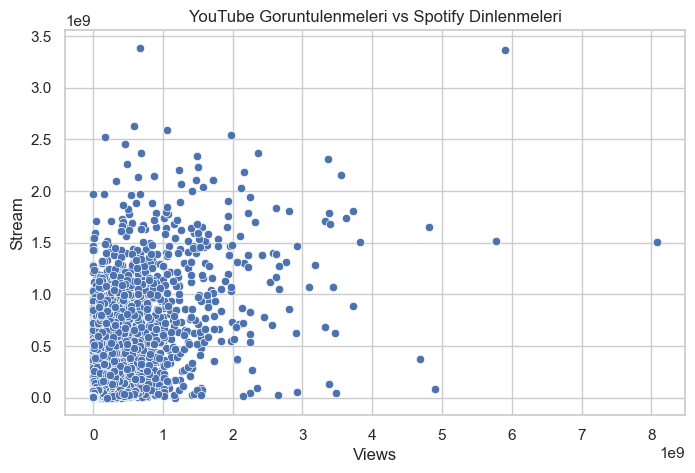

In [39]:
# Scatter plot: YouTube Views vs Spotify Streams
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Views', y='Stream')
plt.title("YouTube Goruntulenmeleri vs Spotify Dinlenmeleri")
plt.show()

 **_YouTube Goruntulenmeleri vs Spotify Dinlenmeleri_**

* Bu grafik, her sarkinin YouTube’daki goruntulenme sayisi ile Spotify’daki dinlenme sayisi arasindaki iliskiyi gosterir
* Noktalarin dagilimina bakildiginda, belirgin bir korelasyon olmadigi goruluyor – yani bir sarki YouTube’da populer olsa bile Spotify’da ayni derecede populer olmayabilir
* Bu durum, farkli platformlarda farkli dinleyici aliskanliklari oldugunu dusundurur
* Ancak, bazi noktalar (outlier’lar) hem YouTube’da hem de Spotify’da yuksek degerlerde, bu da cok yuksek populerlige sahip sarkilari temsil eder

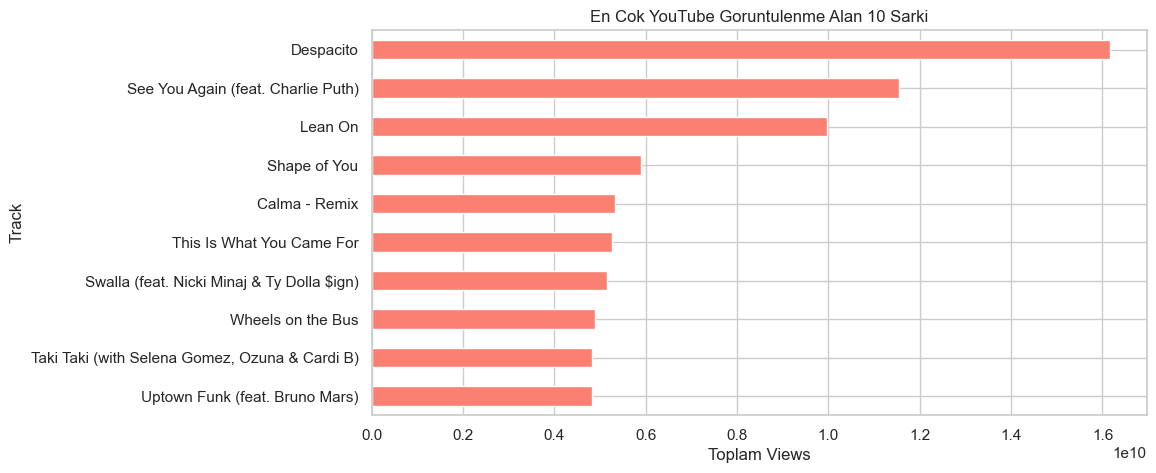

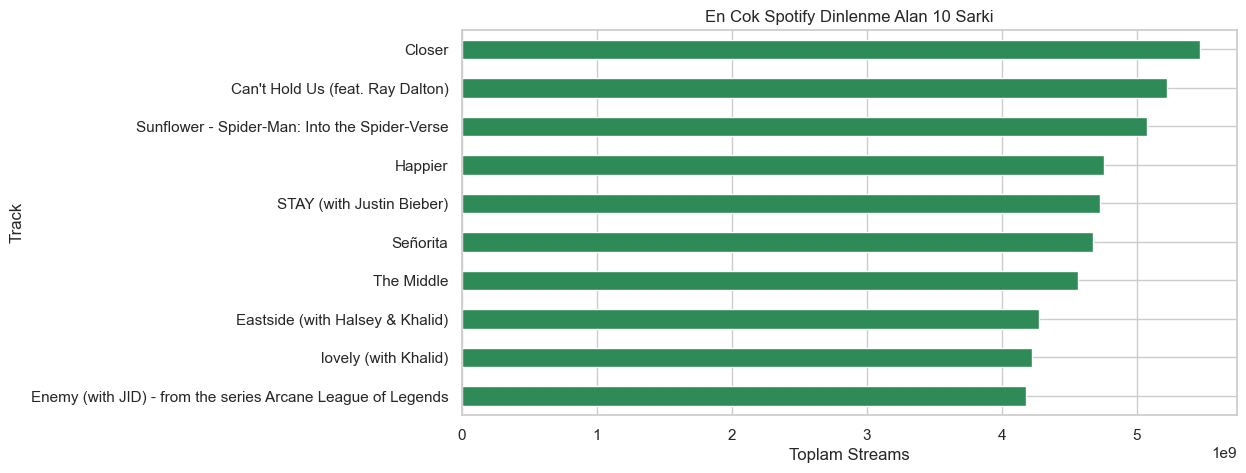

In [40]:
# En cok YouTube goruntulenme alan 10 sarki
top_youtube_songs = df.groupby('Track')['Views'].sum().sort_values(ascending=False).head(10)

# En cok Spotify dinlenme alan 10 sarki
top_spotify_songs = df.groupby('Track')['Stream'].sum().sort_values(ascending=False).head(10)

# Plot YouTube
plt.figure(figsize=(10, 5))
top_youtube_songs.plot(kind='barh', color='salmon')
plt.title("En Cok YouTube Goruntulenme Alan 10 Sarki")
plt.xlabel("Toplam Views")
plt.gca().invert_yaxis()
plt.show()

# Plot Spotify
plt.figure(figsize=(10, 5))
top_spotify_songs.plot(kind='barh', color='seagreen')
plt.title("En Cok Spotify Dinlenme Alan 10 Sarki")
plt.xlabel("Toplam Streams")
plt.gca().invert_yaxis()
plt.show()

###  **_En Cok Dinlenen ve Izlenen Sarkilar_**

* Bu grafiklerde, **YouTube** ve **Spotify** platformlarinda **en cok dinlenme/izlenme alan 10 sarki** gosterilmektedir
* YouTube’da one cikan sarkilar ile Spotify’da one cikanlarin **tam olarak birebir olmadigi** gorulebilir
* Bu farklilik, **platformlarin farkli hedef kitlelere ve dinleme aliskanliklarina sahip** oldugunu gosterir
* Grafikler uzerinde acik ara onde olan sarkilarin oldugu gorulebilir – bu da **viral sarkilarin etkisini** ortaya koyar

## Genel Degerlendirme ve Sonuc

### Bu EDA calismasi ile YouTube ve Spotify uzerindeki populerlik dagilimlari, sanatci bazli performans farkliliklari ve platformlar arasi uyum (veya uyumsuzluk) ortaya konmustur.

### Ogrendiklerimiz:
* Cok satan veya cok dinlenen urunler genelde az sayida sanatci uzerinde yogunlasiyor (Pareto etkisi)
* YouTube ve Spotify populerligi her zaman birebir uyusmuyor
* Dagilimlar genelde saga carpik; bu da log donusumu gibi tekniklerin uygulanmasini anlamli kilabilir
* Yuksek korelasyonlu degiskenler modelleme icin dikkatle ele alinmalidir

### Bu analiz, hem pazarlama stratejileri gelistirmek hem de veriyle destekli kararlar almak icin degerli ipucları sunmaktadir.